<a href="https://colab.research.google.com/github/chacha86/pythonai/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80(%EB%B6%84%EB%A5%98)_%EB%AC%BC%EA%B3%A0%EA%B8%B0_%EC%96%B4%EC%A2%85_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fish = pd.read_csv('/content/Fish.csv')
     

## 1 case => Bream, Smelt (선형)
## 2 case => Perch, Bream (비선형) -> 다항회귀, 결정 트리

## 길이와 무게 특성만 고려

bream_smelt = fish[(fish['Species'] == 'Perch') | (fish['Species'] == 'Bream')]

bream_smelt_train = bream_smelt[['Length1', 'Weight']]
bream_smelt_target = bream_smelt['Species']

## 학습데이터와 테스트 데이터 0.7, 0.3 비율로 만들어주세요.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

trd, tsd, trt, tst = train_test_split(bream_smelt_train, bream_smelt_target, train_size=0.7, random_state=42)

ss = StandardScaler()

scaled_trd = ss.fit_transform(trd)
scaled_tsd = ss.transform(tsd)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(scaled_trd, trt)
lr.score(scaled_trd, trt), lr.score(scaled_tsd, tst)


(0.5555555555555556, 0.6428571428571429)

<Axes: >

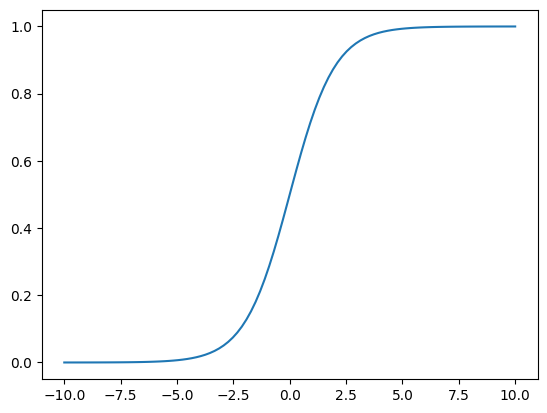

In [5]:
# 시그모이드 함수 -> 입력값을 0 ~ 1 사이 값으로 환산. (확률로 사용하기 위함)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# -10부터 10까지 균일한 간격으로 100개 숫자 만들기    
x = np.linspace(-10, 10, 100)

# 시그모이드 함수 시각화
sns.lineplot(x=x, y=sigmoid(x))

In [6]:
lr.coef_, lr.intercept_

(array([[ 0.16723754, -0.75224469]]), array([0.59677888]))

In [7]:
# 로지스틱 회귀의 가중치와 편향


# 결정함수
def decision_func(x, y) :
  return  -1.78004648 * x -1.31525904 * y - 1.8820759


# 길이가 0.31006874인 물고기의 결정값 
z = decision_func(0.31006874, 0.24553694)

# 물고기가 양성일 확률
sigmoid(z) # 13%

# 양성 클래스(내가 관심있는 클래스), 음성 클래스(양성이 아닌 클래스)
# 두개 중 하나 분류 -> 이진 분류


0.059694925723434274

In [8]:
# 로지스틱 회귀 모델의 결정 함수
lr.decision_function([[ 0.31006874,  0.24553694]])

print(sigmoid(2.75695735)) # 0.05
print(lr.classes_) # 클래스 종류

lr.predict_proba([[ 0.31006874,  0.24553694]]) # 예측 확률



0.9403050743223704
['Bream' 'Perch']


array([[0.3860539, 0.6139461]])

In [9]:
## 스케일링된 데이터에서 어종별 데이터 뽑아내기

scaled_trd_df = pd.DataFrame(scaled_trd, columns=trd.columns)
scaled_tsd_df = pd.DataFrame(scaled_tsd, columns=tsd.columns)

scaled_train = pd.concat([scaled_trd_df, scaled_tsd_df]).reset_index(drop=True)

#scaled_train
target = pd.concat([trt,tst]).reset_index(drop=True)

bream_idx = target == 'Perch'
smelt_idx = target == 'Bream'

bream_data = scaled_train[bream_idx]
smelt_data = scaled_train[smelt_idx]



<Axes: xlabel='Length1', ylabel='Weight'>

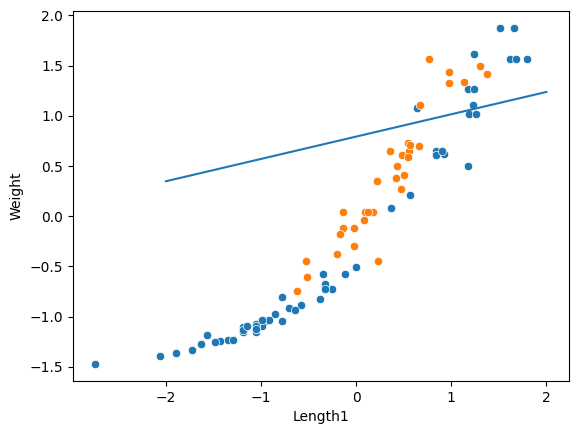

In [10]:
# Bream, Smelt 두 어종을 표준화된 데이터로 산점도로 그리고, 모델이 찾은 선을 그어보세요
sns.scatterplot(data= bream_data, x='Length1', y='Weight')
sns.scatterplot(data= smelt_data, x='Length1', y='Weight')

# 결정 경계 회귀식
# y = -w1 * x - b / w2

# Bream과 Smelt의 관계
## -1.78004648 * x -1.31525904 * y - 1.8820759

# Perch와 Bream의 관계
#  0.16723754 * x,-0.75224469 * y,  0.59677888


x = np.linspace(-2, 2, 100)

## Bream과 Smelt 회귀식
def my_fun1(x) :
  return (1.78004648 * x + 1.8820759) / -1.31525904

## Perch와 Bream 회귀식
def my_fun2(x) :
  return (-0.16723754 * x - 0.59677888) / -0.75224469

# 결정 경계
# sns.lineplot(x=x, y=my_fun1(x)) # Bream과 Smelt 사이의 결정 경계
sns.lineplot(x=x, y=my_fun2(x)) # Perch와 Bream 사이의 결정 경계


In [11]:
## 회귀 모델의 평가 방법
### r2, rmse, mae

## 분류 모델의 평가 방법
### 정확도, 재현율, 정밀도
### 정확도 -> 전체에서 맞춘 것의 비율 ((TN + TP) / (TN + TP + FN + FP)) -> 학습을 할 때, 데이터가 편향되어 있으면 학습이 제대로 X
### 학습데이터 100개 중 음성 클래스 99개, 양성 클래스 1개 -> 오로지 음성이라고만 예측 해도 99%
### 재현율 -> 진짜 맞는 것(양성)중에서 맞춘 비율 ( TP / TP + FN )
### 정밀도 -> 내가 맞다고 한 것(양성 예측)중에 진짜 양성의 비율 ( TP / TP + FP )

### 시험문제 100개. 내가 아는 문제 50개만 풀다. -> 다 맞는다.(정밀도 100%)
### 100개 중 50개만 풀었으니까 나머지 50개는 틀린거 -> 

### 재현율 정밀도 같이 보는 법 -> F1-스코어





In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

pred = lr.predict(scaled_trd)

# 오차행렬
cmat = confusion_matrix(trt, pred)

TN = cmat[0, 0]
FP = cmat[0, 1]
FN = cmat[1, 0]
TP = cmat[1, 1]

## 정확도, 정밀도, 재현율 구하기
## 직접 구하기
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(accuracy, precision, recall)


## 사이킷런 함수를 이용해 구하기
print(accuracy_score(trt, pred))
print(precision_score(trt.values, pred, pos_label='Perch'))
print(recall_score(trt.values, pred, pos_label='Perch'))


0.5555555555555556 0.62 0.775
0.5555555555555556
0.62
0.775
